# Лабораторная работа 8.11
## Вариант 4
## Сидельников Станислав Игоревич

## Решение системы уравнений

$ x' = z $,

$ y' = u $,

$ z' = \frac{x}{(x^2 + y^2)3/2} $

$ u' = - \frac{y}{(x^2 + y^2)3/2} $

## Начальные условия

$ x(0) = 0.5 $

$ y(0) = z(0) = 0 $

$ u(0) = \sqrt{3} \simeq 1.73 $

$ 0 <= t <= 20$

In [40]:
import numpy as np              
import matplotlib.pyplot as plt

In [41]:

# начальные значения
y_0 = np.array([0.5, 0, 0, 1.73])

# границы интервала времени
t_0 = 0
t_1 = 20


def f(y):
    
    res = np.copy(y)
    
    res[0] = y[2]
    res[1] = y[3]
    res[2] = 1.0 * y[0] / ((y[0] ** 2 + y[1] ** 2) ** 1.5)
    res[3] = - 1.0 * y[1] / ((y[0] ** 2 + y[1] ** 2) ** 1.5)
    
    return res

In [42]:
f(y_0)

array([ 0.  ,  1.73,  4.  , -0.  ])

In [43]:

def step(y_n):
    
    k = np.arange(b.size * y_n.size, dtype = float).reshape(b.size, y_n.size)
    
    for i in range(b.size):
        
        y_i = np.copy(y_n)
        
        for j in range(i):
            y_i += h * a[i][j] * k[j] 
            
        k[i] = f(np.copy(y_i))

    for i in range(b.size):
        y_n += h * b[i] * k[i]
        
    return y_n
        

[0.500008   0.00345998 0.00799972 1.72997232]
[0.51996158 0.17422267 0.37635678 1.66784087]
[0.57123925 0.33527739 0.62923357 1.55187809]
[0.64258509 0.48503555 0.78550242 1.44710001]
[0.72651502 0.62548508 0.88635975 1.36555803]
[0.81882971 0.75878793 0.9560218  1.30323739]
[0.91710279 0.88659817 1.00700519 1.25493404]
[1.0198351  1.01010977 1.04602921 1.21672216]
[1.12603994 1.13018742 1.07694506 1.18588264]
[1.23503305 1.24746903 1.10210248 1.16054336]
[1.34631945 1.3624354  1.12301417 1.13939552]
[1.45952865 1.47545643 1.14069871 1.12150489]
[1.57437556 1.58682205 1.15586808 1.10619025]
[1.69063569 1.69676332 1.16903585 1.09294482]
[1.80812879 1.80546709 1.18058238 1.08138462]
[1.9267078  1.91308649 1.19079586 1.07121388]
[2.046251   2.01974842 1.19989891 1.06220131]
[2.16665644 2.1255592  1.20806644 1.05416365]
[2.28783778 2.23060872 1.21543792 1.04695391]
[2.40972126 2.33497359 1.22212604 1.04045289]
[2.5322433  2.43871965 1.22822288 1.03456298]
[2.65534868 2.54190385 1.23380451 

<IPython.core.display.Javascript object>


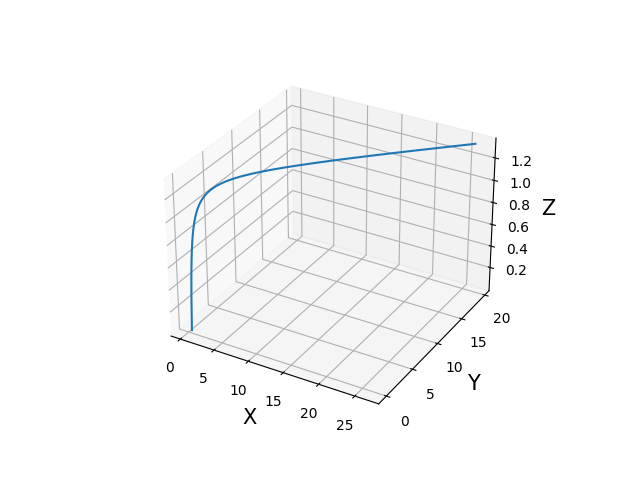

In [54]:
# первый порядок

b = np.array([1.0])
c = np.array([0.0])
a = np.array([np.array([0.0])])

# второй порядок

b = np.array([0.0, 1.0])
c = np.array([0.0, 0.5])
a = np.array([np.array([0.0, 0.0]),
              np.array([0.5, 0.0])
             ])

## третий порядок аппроксимации
b = np.array([1.0 / 6.0, 2.0 / 3.0, 1.0 / 6.0])
c = np.array([0.0, 0.5, 1.0])
a = np.array([np.array([0.0, 0.0, 0.0]),
              np.array([0.5, 0.0, 0.0]),
              np.array([0.0, 1.0, 0.0])])
    
## четвертый порядок аппроксимации
b = np.array([1.0 / 6.0, 1.0 / 3.0, 1.0 / 3.0, 1.0 / 6.0])
c = np.array([0.0, 0.5, 0.5, 1.0])
a = np.array([np.array([0.0, 0.0, 0.0, 0.0]),
              np.array([0.5, 0.0, 0.0, 0.0]),
              np.array([0.0, 0.5, 0.0, 0.0]),
              np.array([0.0, 0.0, 1.0, 0.0])
])


# шаг в итерационном процессе
h = 0.001
        
def iter_step(h):
    y_trace = np.array([np.copy(y_0)])
    for i in range(round((t_1 - t_0) / h)):
        y_trace = np.append(y_trace, [step(np.copy(y_trace[i]))], axis = 0)

    for i in range(y_trace.size // 4):
        if(i % 100 == 0):
            print(y_trace[i])
            
    return y_trace

def plot_trajectory():
    %matplotlib notebook
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(y_trace[:, 0], y_trace[:, 1], y_trace[:, 2], label='solution')
    ax.set_xlabel("X", fontsize=15)
    ax.set_ylabel("Y", fontsize=15)
    ax.set_zlabel("Z", fontsize=15)
    plt.draw()
    plt.show()
    

y_trace = iter_step(0.001)
plot_trajectory()

[0.500008   0.00345998 0.00799972 1.72997232]
[0.51996158 0.17422267 0.37635678 1.66784087]
[0.57123925 0.33527739 0.62923357 1.55187809]
[0.64258509 0.48503555 0.78550242 1.44710001]
[0.72651502 0.62548508 0.88635975 1.36555803]
[0.81882971 0.75878793 0.9560218  1.30323739]
[0.91710279 0.88659817 1.00700519 1.25493404]
[1.0198351  1.01010977 1.04602921 1.21672216]
[1.12603994 1.13018742 1.07694506 1.18588264]
[1.23503305 1.24746903 1.10210248 1.16054336]
[1.34631945 1.3624354  1.12301417 1.13939552]
[1.45952865 1.47545643 1.14069871 1.12150489]
[1.57437556 1.58682205 1.15586808 1.10619025]
[1.69063569 1.69676332 1.16903585 1.09294482]
[1.80812879 1.80546709 1.18058238 1.08138462]
[1.9267078  1.91308649 1.19079586 1.07121388]
[2.046251   2.01974842 1.19989891 1.06220131]
[2.16665644 2.1255592  1.20806644 1.05416365]
[2.28783778 2.23060872 1.21543792 1.04695391]
[2.40972126 2.33497359 1.22212604 1.04045289]
[2.5322433  2.43871965 1.22822288 1.03456298]
[2.65534868 2.54190385 1.23380451 

<IPython.core.display.Javascript object>


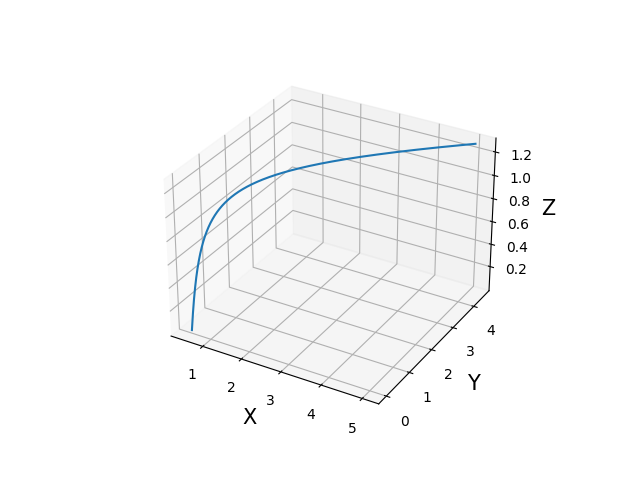

In [56]:
y_trace = iter_step(0.005)
plot_trajectory()

[0.500008   0.00345998 0.00799972 1.72997232]
[0.51996158 0.17422267 0.37635678 1.66784087]
[0.57123925 0.33527739 0.62923357 1.55187809]
[0.64258509 0.48503555 0.78550242 1.44710001]
[0.72651502 0.62548508 0.88635975 1.36555803]


<IPython.core.display.Javascript object>


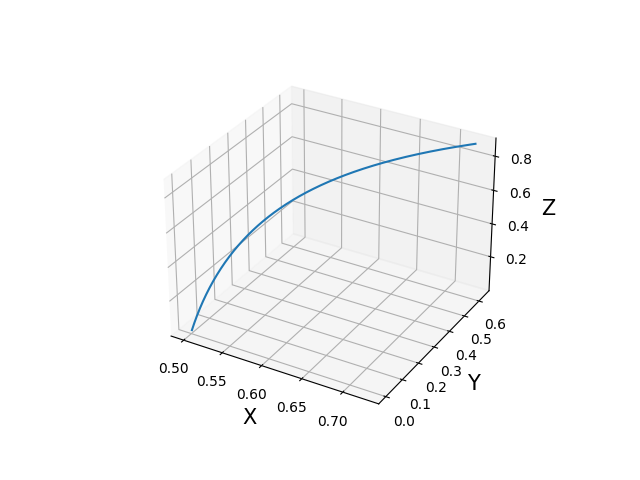

In [57]:
y_trace = iter_step(0.05)
plot_trajectory()

[0.500008   0.00345998 0.00799972 1.72997232]
[0.51996158 0.17422267 0.37635678 1.66784087]
[0.57123925 0.33527739 0.62923357 1.55187809]


<IPython.core.display.Javascript object>


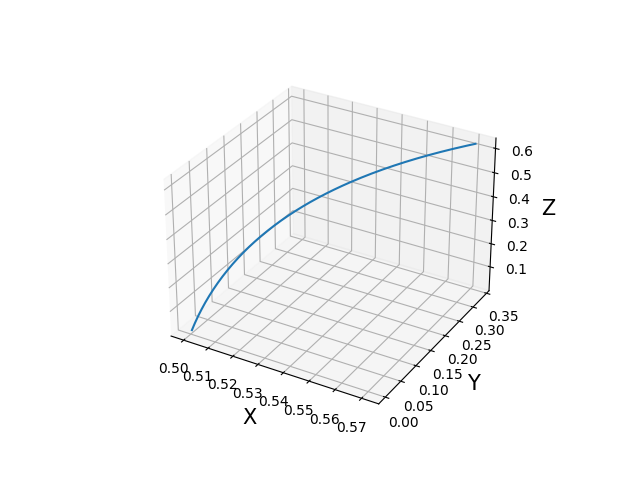

In [58]:
y_trace = iter_step(0.1)
plot_trajectory()